In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM


In [2]:
stock_data=pd.read_csv("TSLA.csv")
stock_data.head()
stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
stock_data.shape #This line checks the shape of the dataset, which gives you the number of rows and columns.


(2416, 7)

In [6]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


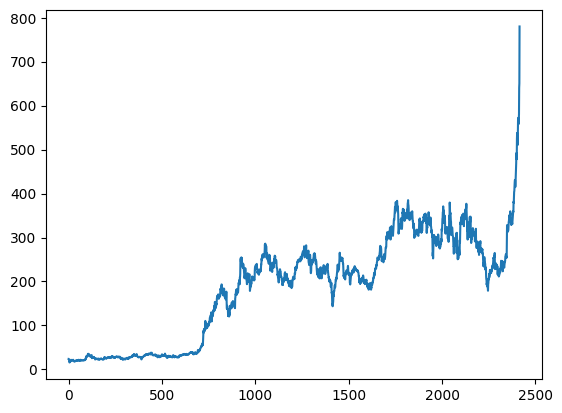

In [7]:
df = stock_data.reset_index()['Close']
df.shape
plt.plot(stock_data['Close']);

In [8]:
#scaling values between (0,1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df)

[[0.01058623]
 [0.01050772]
 [0.00806072]
 ...
 [0.81786181]
 [0.83063335]
 [1.        ]]


In [9]:
train_len = int(len(df)*0.80)
#heren we are training 80 % dataset and will be used as training set
test_len = int(len(df)-train_len)
#test of data set is used as testing dataset

train_data = df[0:train_len:]
test_data = df[train_len:len(df):1]

In [10]:
train_len,test_len

(1932, 484)

In [11]:
len(train_data),len(test_data)

(1932, 484)

In [12]:
def create_dataset(dataset,time_step= 1):
    dataX,dataY =[],[]
    for i in range(len(dataset)-time_step - 1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX),np.array(dataY)

In [13]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [14]:
print(x_train.shape, y_train.shape)
print((x_test.shape),print(y_test.shape))

(1831, 100) (1831,)
(383,)
(383, 100) None


In [15]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [16]:
model =Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
29/29 [==============================] - 9s 149ms/step - loss: 0.0099 - val_loss: 0.0031
Epoch 2/50
29/29 [==============================] - 3s 115ms/step - loss: 6.9185e-04 - val_loss: 0.0026
Epoch 3/50
29/29 [==============================] - 3s 120ms/step - loss: 4.0571e-04 - val_loss: 0.0020
Epoch 4/50
29/29 [==============================] - 4s 128ms/step - loss: 3.6649e-04 - val_loss: 0.0020
Epoch 5/50
29/29 [==============================] - 4s 121ms/step - loss: 3.4601e-04 - val_loss: 0.0019
Epoch 6/50
29/29 [==============================] - 4s 123ms/step - loss: 3.3818e-04 - val_loss: 0.0018
Epoch 7/50
29/29 [==============================] - 4s 138ms/step - loss: 3.8000e-04 - val_loss: 0.0018
Epoch 8/50
29/29 [==============================] - 3s 114ms/step - loss: 3.0767e-04 - val_loss: 0.0017
Epoch 9/50
29/29 [==============================] - 3s 114ms/step - loss: 3.0694e-04 - val_loss: 0.0016
Epoch 10/50
29/29 [==============================] - 4s 137ms/step -

In [19]:
#predicting and checcking performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

12/12 [==============================] - 0s 26ms/step


In [20]:
train_predict =scaler.inverse_transform(train_predict)
test_predict= scaler.inverse_transform(test_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error

In [22]:
#calculate RMSE performance metrics for train data
math.sqrt(mean_squared_error(y_train,train_predict))

190.61320012625353

In [23]:
#shift train prediction for plotting
look_back=100
trainPredictPlot=np.empty_like(df)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, : ] = train_predict


In [24]:
#shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1 : len(df)-1, :]= test_predict

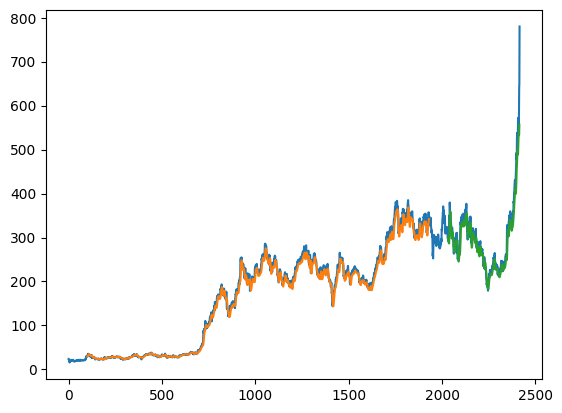

In [25]:
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [26]:
len(test_data)


484

In [27]:
x_input = test_data[152:].reshape(1,-1)
x_input.shape

(1, 332)

In [28]:
temp_input=list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.3071970662130332,
 0.3232138026694582,
 0.31546716173776496,
 0.3093823554043444,
 0.31795341402774135,
 0.3190133420570531,
 0.34125882753205966,
 0.3349646676262758,
 0.3246663229521068,
 0.3195498560586234,
 0.3207930018319812,
 0.36422404475268255,
 0.3568437581784873,
 0.39133732661606907,
 0.41232660821774403,
 0.4174954278984559,
 0.411018050248626,
 0.42072756739073536,
 0.4298351203873331,
 0.4326223554043444,
 0.4260664668934833,
 0.42562156241821514,
 0.434912331850301,
 0.43915204658466367,
 0.43798745092907615,
 0.4128238667887987,
 0.4225726393614237,
 0.42946872546453807,
 0.43527872546453805,
 0.44295995550902906,
 0.44186077074064384,
 0.4340355796911803,
 0.42186600628107823,
 0.4056922101544098,
 0.4320858414027741,
 0.4293640578382622,
 0.434532838262235,
 0.4257655234231876,
 0.43794819549856057,
 0.44842971735147863,
 0.4500131012823868,
 0.45440983773881183,
 0.447749281601675,
 0.4571447186600366,
 0.45925151792724417,
 0.4590421434179534,
 0.4723763530489400

In [29]:
lst_output = []
n_steps = 100
i = 0
while i<30:
    if len(temp_input) >= n_steps:
        x_input = np.array(temp_input[:n_steps])  # Use the first n_steps
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, len(temp_input), 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


0 day input [0.30719707 0.3232138  0.31546716 0.30938236 0.31795341 0.31901334
 0.34125883 0.33496467 0.32466632 0.31954986 0.320793   0.36422404
 0.35684376 0.39133733 0.41232661 0.41749543 0.41101805 0.42072757
 0.42983512 0.43262236 0.42606647 0.42562156 0.43491233 0.43915205
 0.43798745 0.41282387 0.42257264 0.42946873 0.43527873 0.44295996
 0.44186077 0.43403558 0.42186601 0.40569221 0.43208584 0.42936406
 0.43453284 0.42576552 0.4379482  0.44842972 0.4500131  0.45440984
 0.44774928 0.45714472 0.45925152 0.45904214 0.47237635 0.45787751
 0.43525257 0.42034808 0.41503533 0.3920178  0.39776235 0.36585974
 0.40603245 0.39299922 0.41621303 0.41481286 0.38513477 0.37236324
 0.39504057 0.41763935 0.41814971 0.42231091 0.43073803 0.43373464
 0.41690656 0.4300314  0.43215125 0.43380005 0.37484953 0.37047895
 0.35565297 0.36078253 0.36801886 0.3671552  0.36856843 0.38336821
 0.38107824 0.38786966 0.38875951 0.3998299  0.39442554 0.38171946
 0.3794818  0.38869405 0.38734624 0.38258311 0.376

In [30]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [31]:
len(df)

2416

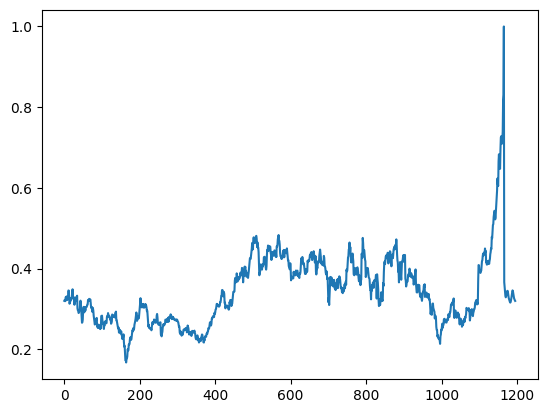

In [32]:
df3= df.tolist()
df3.extend(lst_output)
plt.plot(df3[1250:]);